Размер датасета: (6435, 8)

Пропуски по столбцам:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Основная статистика по продажам:
count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64


C:\Users\dzusk\AppData\Local\Temp\ipykernel_20896\454432103.py:36: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  plt.tight_layout()
C:\Users\dzusk\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


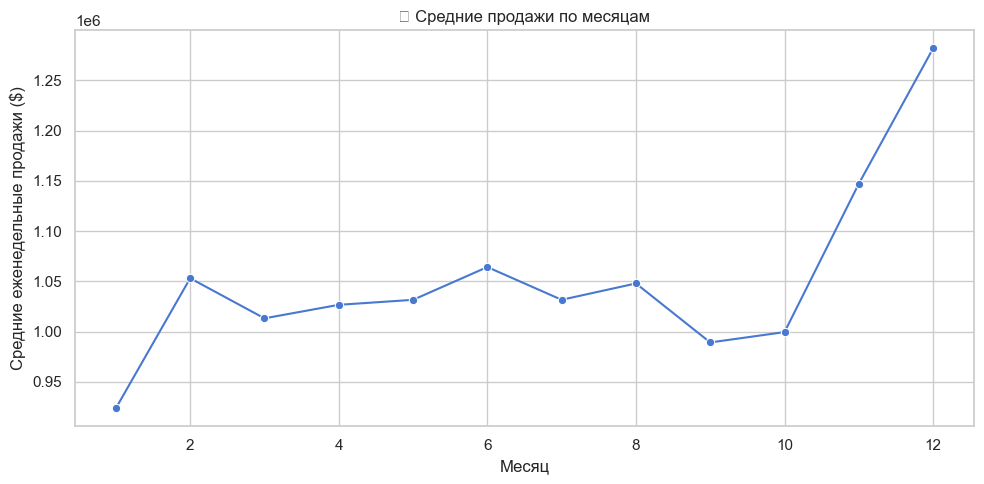

C:\Users\dzusk\AppData\Local\Temp\ipykernel_20896\454432103.py:46: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\dzusk\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


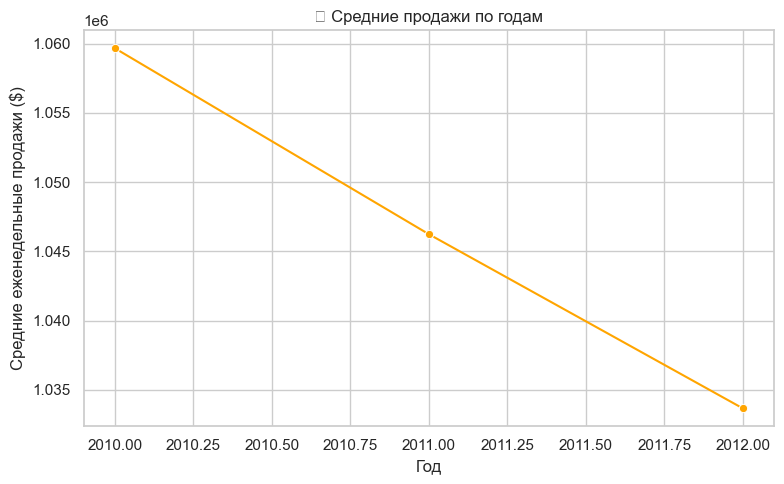

C:\Users\dzusk\AppData\Local\Temp\ipykernel_20896\454432103.py:55: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  plt.tight_layout()
C:\Users\dzusk\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


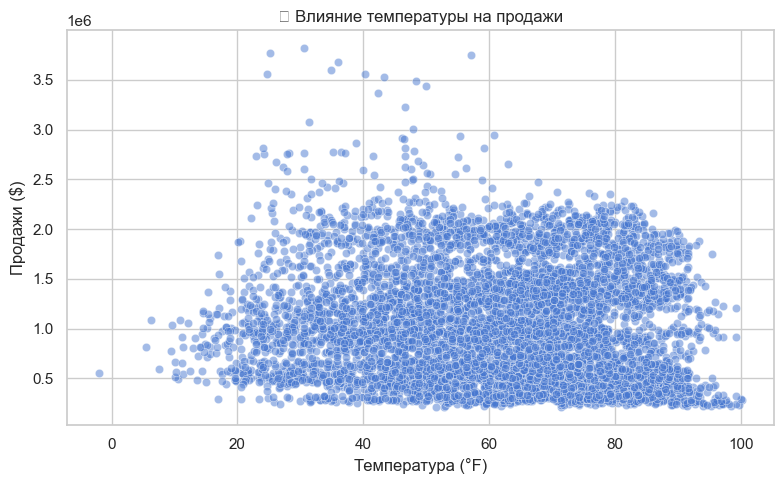

C:\Users\dzusk\AppData\Local\Temp\ipykernel_20896\454432103.py:63: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\dzusk\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


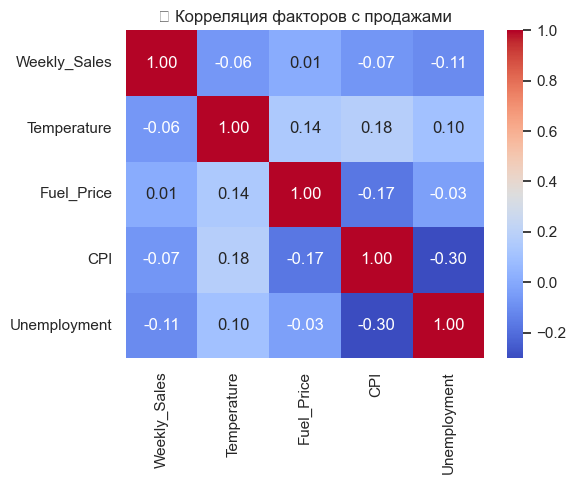


📊 Выводы:
1. Продажи демонстрируют сезонность — пики приходятся на праздники (ноябрь–декабрь).
2. Наблюдается слабая отрицательная корреляция между температурой и продажами — зимой больше покупок.
3. Факторы топлива, CPI и безработицы слабо влияют на еженедельные продажи.
4. Анализ можно расширить, добавив сравнение по магазинам (Store) и флаг праздников (Holiday_Flag).



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки
sns.set(style="whitegrid", palette="muted")

# Загрузка
df = pd.read_csv("data/Walmart.csv")
print("Размер датасета:", df.shape)

# Проверяем пропуски
print("\nПропуски по столбцам:")
print(df.isna().sum())

# Очистка данных
df = df.dropna(subset=["Date", "Weekly_Sales"])
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

# Добавляем временные признаки
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Week"] = df["Date"].dt.isocalendar().week

# Общая статистика
print("\nОсновная статистика по продажам:")
print(df["Weekly_Sales"].describe())

# 1️⃣ Сезонность продаж по месяцам
monthly_sales = df.groupby("Month")["Weekly_Sales"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")
plt.title("📆 Средние продажи по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Средние еженедельные продажи ($)")
plt.tight_layout()
plt.show()

# 2️⃣ Динамика продаж по годам
yearly_sales = df.groupby("Year")["Weekly_Sales"].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker="o", color="orange")
plt.title("📈 Средние продажи по годам")
plt.xlabel("Год")
plt.ylabel("Средние еженедельные продажи ($)")
plt.tight_layout()
plt.show()

# 3️⃣ Влияние температуры на продажи
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=df, alpha=0.5)
plt.title("🌡 Влияние температуры на продажи")
plt.xlabel("Температура (°F)")
plt.ylabel("Продажи ($)")
plt.tight_layout()
plt.show()

# 4️⃣ Корреляции
corr = df[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Корреляция факторов с продажами")
plt.tight_layout()
plt.show()

# Выводы
print("""
📊 Выводы:
1. Продажи демонстрируют сезонность — пики приходятся на праздники (ноябрь–декабрь).
2. Наблюдается слабая отрицательная корреляция между температурой и продажами — зимой больше покупок.
3. Факторы топлива, CPI и безработицы слабо влияют на еженедельные продажи.
4. Анализ можно расширить, добавив сравнение по магазинам (Store) и флаг праздников (Holiday_Flag).
""")